**Note**: These functions use live-plotting using PyPlot, but the notebook will only show the final plot

In [4]:
# Solve linear advection using Discontinuous Galerkin and RK4
#
# UC Berkeley Math 228B, Per-Olof Persson <persson@berkeley.edu>

using PyPlot

In [5]:
function dgconvect0(; n=10, p=1, T=1.0, dt=1e-3)
    # Discretization
    h = 1 / n
    s = @. (0:p) / p
    x = @. h*s + (0:h:1-h)'

    # Gaussian initial condition (and exact solution if shifted)
    uinit(x) = exp(-(x - 0.5)^2 / 0.1^2)

    # Mass and stiffness matrices
    if p == 1
        Mel = h/6 * [2 1; 1 2]
        Kel = 1/2 * [-1 -1; 1 1]
    elseif p == 2
        Mel = h/30 * [4 2 -1; 2 16 2; -1 2 4]
        Kel = 1/6 * [-3 -4 1; 4 0 -4; -1 4 3]
    else
        error("Polynomial degree not implemented")
    end
        
    # RHS function in semi-discrete system
    function rhs(u)
        r = Kel * u
        r[end,:] = r[end,:] - u[end,:]
        r[1,:] = r[1,:] + u[end, [end; 1:end-1]]
        r = Mel \ r
    end

    # Setup
    u = uinit.(x)
    nsteps = round(Int, T/dt)

    # Setup plotting
    xx = (0:0.01:1) # For exact solution
    clf(); axis([0, 1, -0.1, 1.1]); grid(true);
    ph1 = plot(x, u, "b")   # Many line object (since discontinuous)
    ph2, = plot(xx, uinit.(xx), "k") # Single line object

    # Main loop
    for it = 1:nsteps
        # Runge-Kutta 4
        k1 = dt * rhs(u)
        k2 = dt * rhs(u + k1/2)
        k3 = dt * rhs(u + k2/2)
        k4 = dt * rhs(u + k3)
        u += (k1 + 2*k2 + 2*k3 + k4) / 6

        # Plotting
        if mod(it, round(nsteps/100)) == 0
            uexact = @. uinit(mod(xx - dt*it, 1.0))
            for line in ph1 line.remove(); end
            ph1 = plot(x, u, "b")
            ph2.set_data(xx, uexact)
            pause(1e-3)
        end
    end

    uexact = @. uinit(mod(x - T, 1.0))  # Exact final solution
    error = maximum(abs.(u - uexact))   # Discrete inf-norm error
    return u, error
end

dgconvect0 (generic function with 1 method)

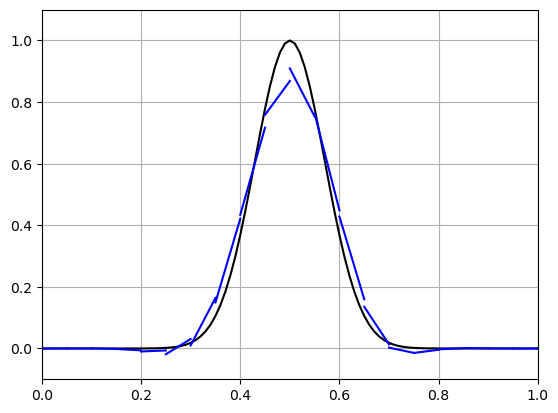

sys:1: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
sys:1: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
sys:1: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
sys:1: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
sys:1: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
sys:1: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
sys:1: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
sys:1: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
sys:1: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
sys:1: Use

0.13161743107616486

In [6]:
u,error = dgconvect0(p=1, n=20)
error